### Etude des variables dans la catégorie solvabilité

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
data.columns.tolist()
# Supprimer les espaces en trop autour des noms de colonnes
data.columns = data.columns.str.strip()

In [14]:
data.columns.tolist()

['Bankrupt?',
 'ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Operating Profit Rate',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Non-industry income and expenditure/revenue',
 'Continuous interest rate (after tax)',
 'Operating Expense Rate',
 'Research and development expense rate',
 'Cash flow rate',
 'Interest-bearing debt interest rate',
 'Tax rate (A)',
 'Net Value Per Share (B)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Persistent EPS in the Last Four Seasons',
 'Cash Flow Per Share',
 'Revenue Per Share (Yuan ¥)',
 'Operating Profit Per Share (Yuan ¥)',
 'Per Share Net profit before tax (Yuan ¥)',
 'Realized Sales Gross Profit Growth Rate',
 'Operating Profit Growth Rate',
 'After-tax Net Profit Growth Rate',
 'Regular Net Profit Growth Rate',
 'Continuous Net Profit Growth 

In [2]:
autres = [
    "Tax rate (A)",
    "Net Value Per Share (B)",
    "Net Value Per Share (A)",
    "Net Value Per Share (C)",
    "Revenue Per Share (Yuan ¥)",
    "Operating Profit Per Share (Yuan ¥)",
    "Per Share Net profit before tax (Yuan ¥)",
    "Total income/Total expense",
    "Total expense/Assets",
    "Fixed Assets to Assets",
    "Current Liability to Liability",
    "Current Liability to Equity",
    "Equity to Long-term Liability",
    "Total assets to GNP price",
    "No-credit Interval"
]


data_solv = data[[col for col in data.columns if col in autres]]
len(autres)

15

,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total income/Total expense,Total expense/Assets,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Total assets to GNP price,No-credit Interval,Bankrupt,Liability-Assets Flag
Tax rate (A),1.000000,0.129891,0.130495,0.130665,-0.021313,0.197467,0.208763,-0.000944,-0.081476,-0.010045,0.064182,-0.015970,-0.054426,-0.023643,0.011488,-0.109706,-0.028425
Net Value Per Share (B),0.129891,1.000000,0.999342,0.999179,-0.008235,0.607623,0.726321,0.023143,-0.235573,-0.003112,0.044689,-0.102098,-0.089004,-0.059970,0.014303,-0.165399,-0.096776
Net Value Per Share (A),0.130495,0.999342,1.000000,0.999837,-0.008193,0.606954,0.725956,0.023136,-0.234878,-0.003094,0.044624,-0.102539,-0.090725,-0.059780,0.014424,-0.165465,-0.096506
Net Value Per Share (C),0.130665,0.999179,0.999837,1.000000,-0.008222,0.606895,0.725825,0.023117,-0.235062,-0.003107,0.044538,-0.102431,-0.090667,-0.059826,0.014335,-0.164784,-0.096527
Revenue Per Share (Yuan ¥),-0.021313,-0.008235,-0.008193,-0.008222,1.000000,-0.014822,-0.011663,-0.000558,-0.017885,-0.000311,-0.027977,-0.006360,0.010574,-0.001272,0.027256,-0.004692,-0.000881
Operating Profit Per Share (Yuan ¥),0.197467,0.607623,0.606954,0.606895,-0.014822,1.000000,0.861813,0.015660,-0.070742,-0.006732,0.135996,-0.055461,-0.094285,-0.032299,0.001169,-0.142051,-0.046381
Per Share Net profit before tax (Yuan ¥),0.208763,0.726321,0.725956,0.725825,-0.011663,0.861813,1.000000,0.022244,-0.156954,-0.006482,0.106568,-0.089174,-0.110478,-0.028837,0.008267,-0.201395,-0.104995
Total income/Total expense,-0.000944,0.023143,0.023136,0.023117,-0.000558,0.015660,0.022244,1.000000,-0.022219,-0.000429,0.013303,-0.006980,-0.005368,-0.001687,0.017818,-0.007137,-0.001636
Total expense/Assets,-0.081476,-0.235573,-0.234878,-0.235062,-0.017885,-0.070742,-0.156954,-0.022219,1.000000,-0.011092,0.192153,0.063345,-0.003318,0.107944,-0.004314,0.139049,0.136084
Fixed Assets to Assets,-0.010045,-0.003112,-0.003094,-0.003107,-0.000311,-0.006732,-0.006482,-0.000429,-0.011092,1.000000,0.013908,0.015258,-0.002922,-0.000599,-0.006361,0.066328,-0.000415


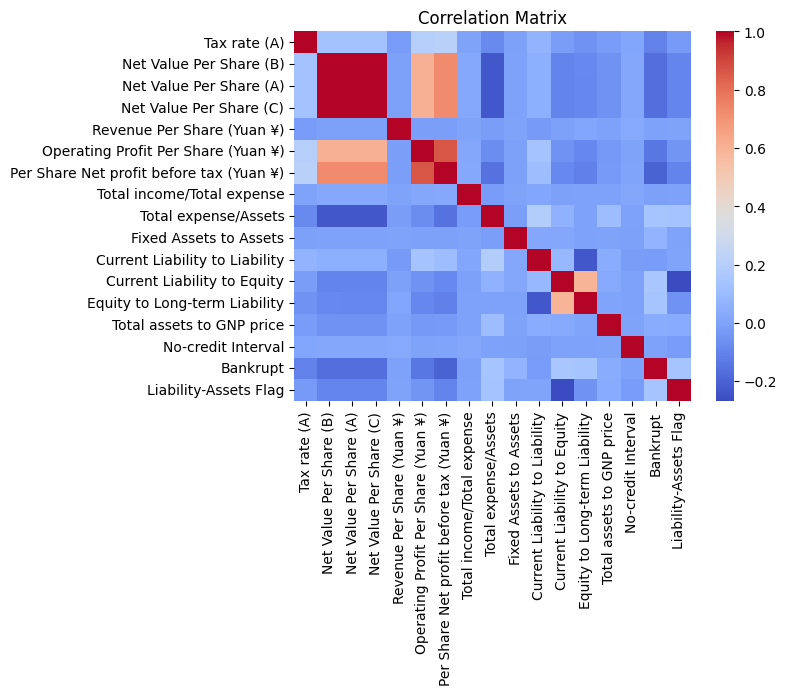

In [15]:
corr = data_solv.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Matrix")
corr

7.572138232690437


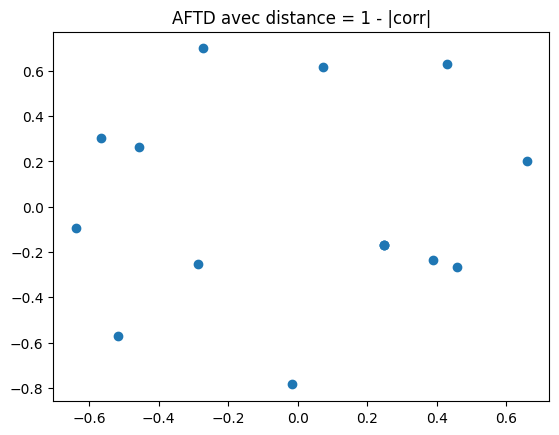

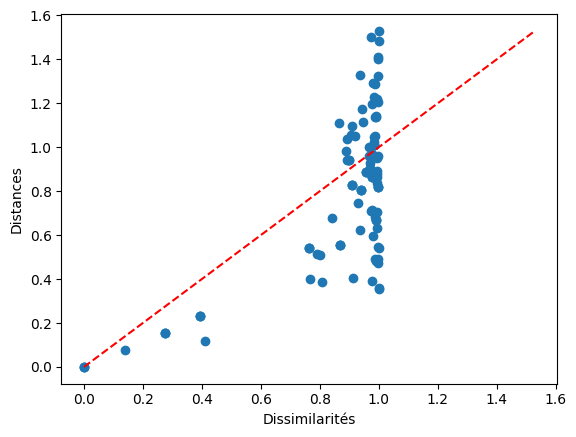

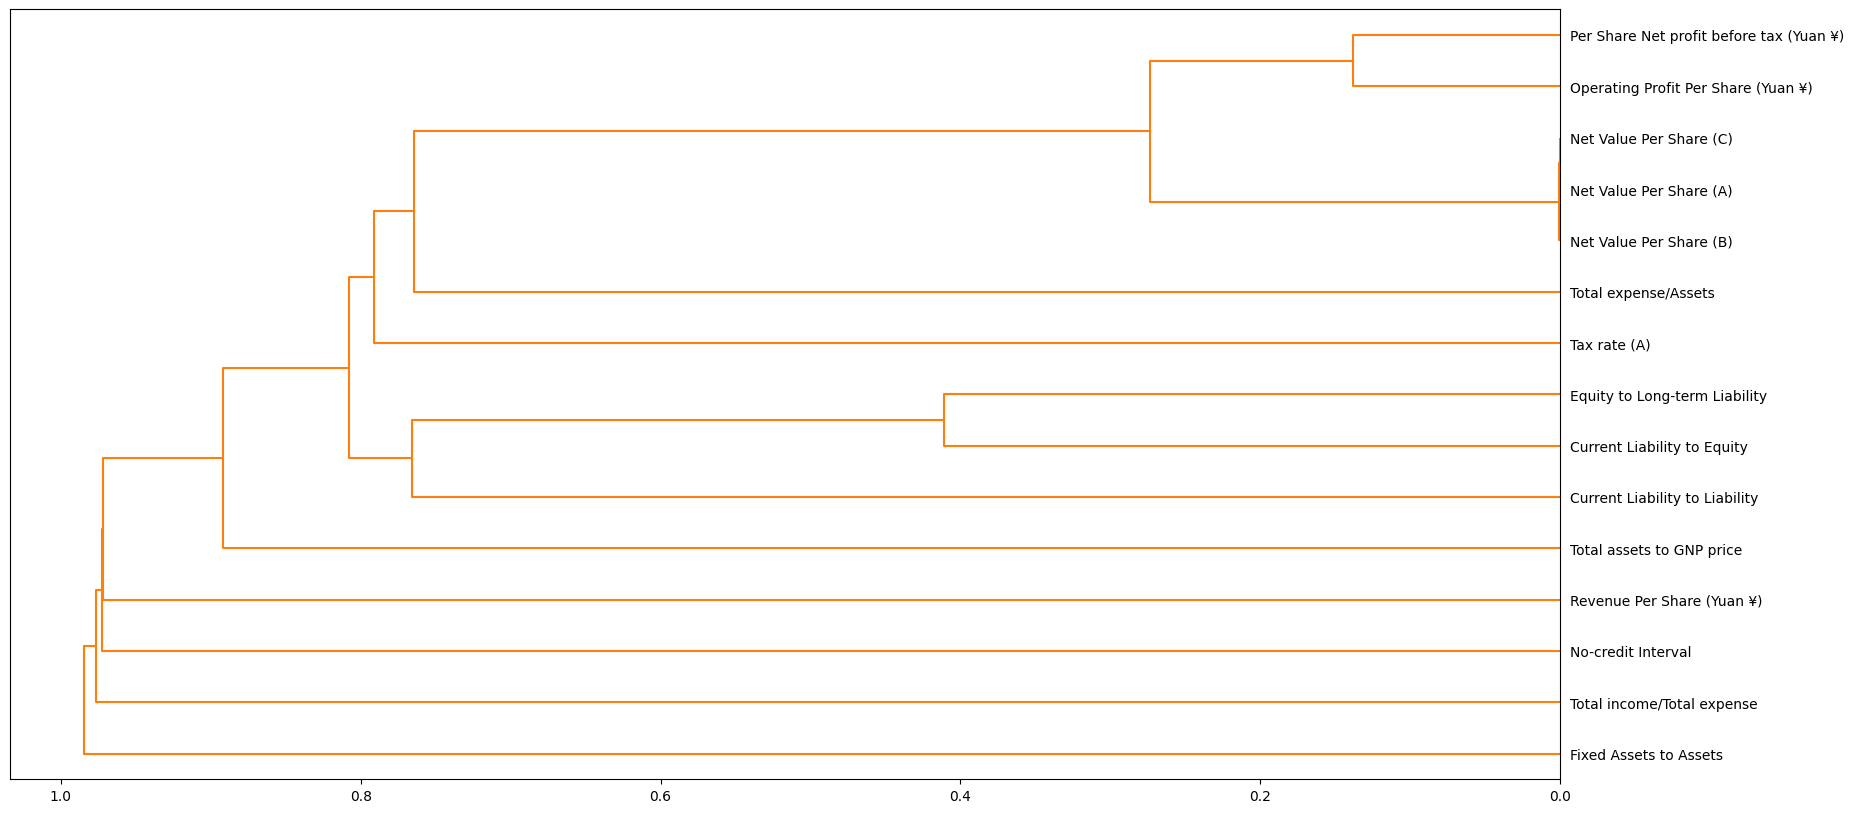

In [4]:
from sklearn.manifold import MDS
from src1.utils import plot_Shepard
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from src1.utils import plot_dendrogram

# Méthode 1 : distance = 1 - |corrélation|
distance1 = 1-abs(corr)


aftd = MDS(n_components=2, dissimilarity='precomputed')
dist1 = aftd.fit_transform(distance1)
print(aftd.stress_)
plt.scatter(*dist1.T)
plt.title("AFTD avec distance = 1 - |corr|")
plt.show()
plot_Shepard(aftd)
plt.show()

cls = AgglomerativeClustering(metric="precomputed", linkage="single", n_clusters=None, distance_threshold=0).fit(distance1)
plt.figure(figsize=(20, 10))
plot_dendrogram(cls, color_threshold=1, labels=corr.columns, orientation="left")

In [5]:
data_solv['Bankrupt'] = data['Bankrupt?'].values
data_solv['Liability-Assets Flag']=data['Liability-Assets Flag'].values

/var/folders/w9/n00_q7c121n3slw3dpckcykr0000gn/T/ipykernel_7234/3523034060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_solv['Bankrupt'] = data['Bankrupt?'].values
/var/folders/w9/n00_q7c121n3slw3dpckcykr0000gn/T/ipykernel_7234/3523034060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_solv['Liability-Assets Flag']=data['Liability-Assets Flag'].values


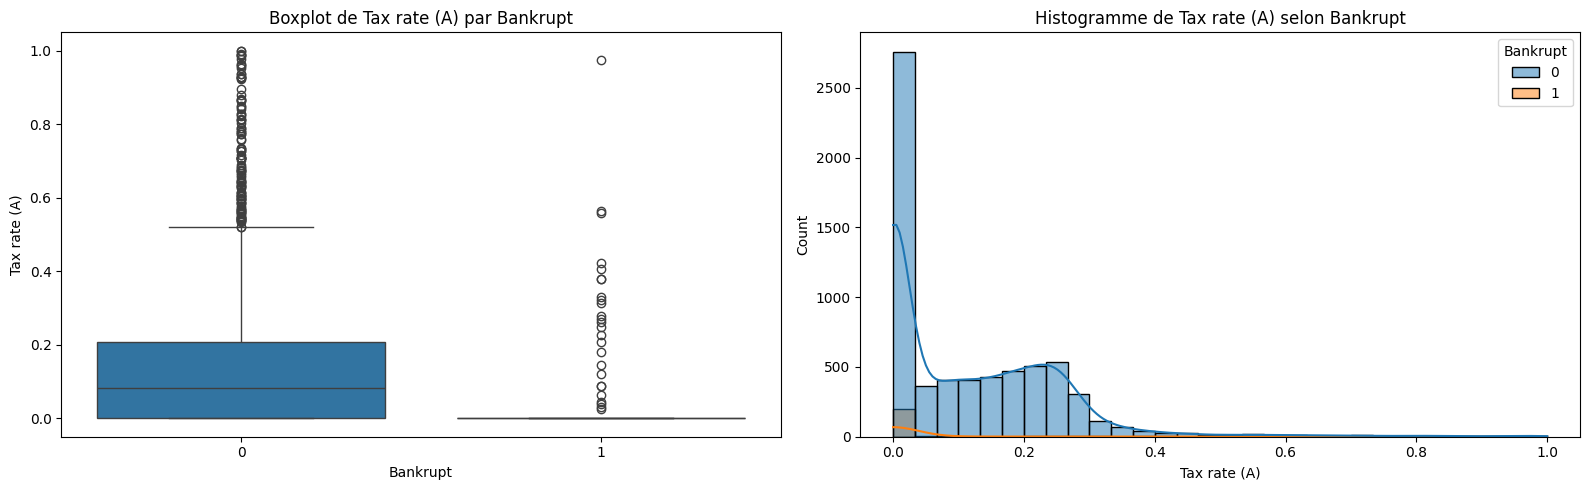

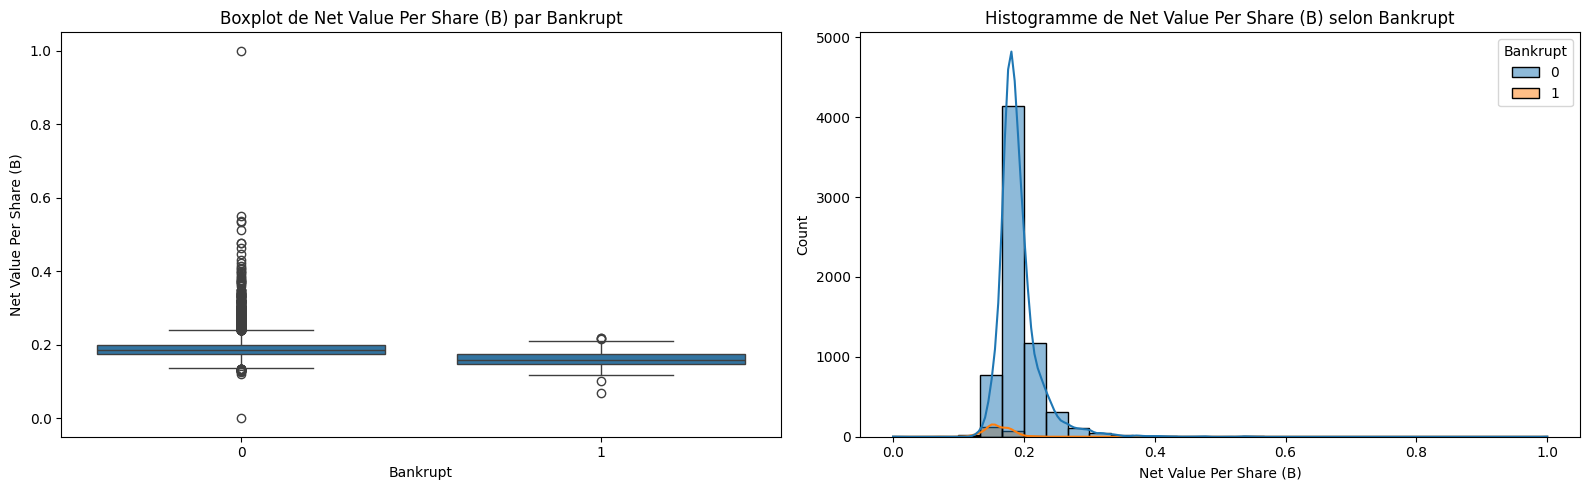

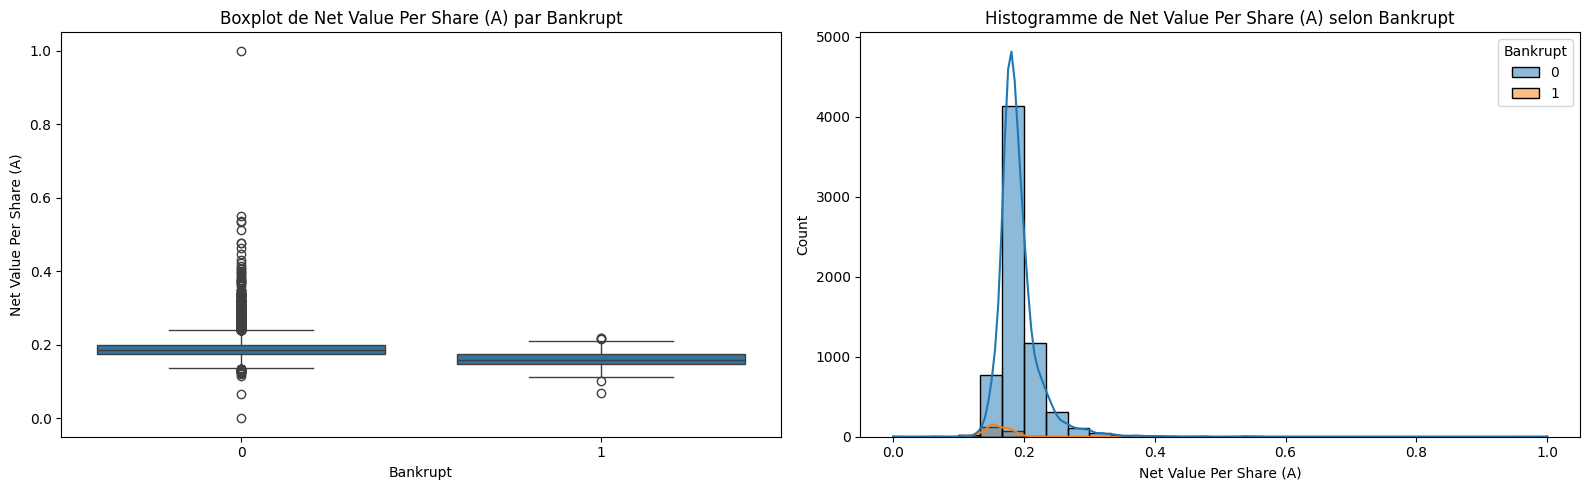

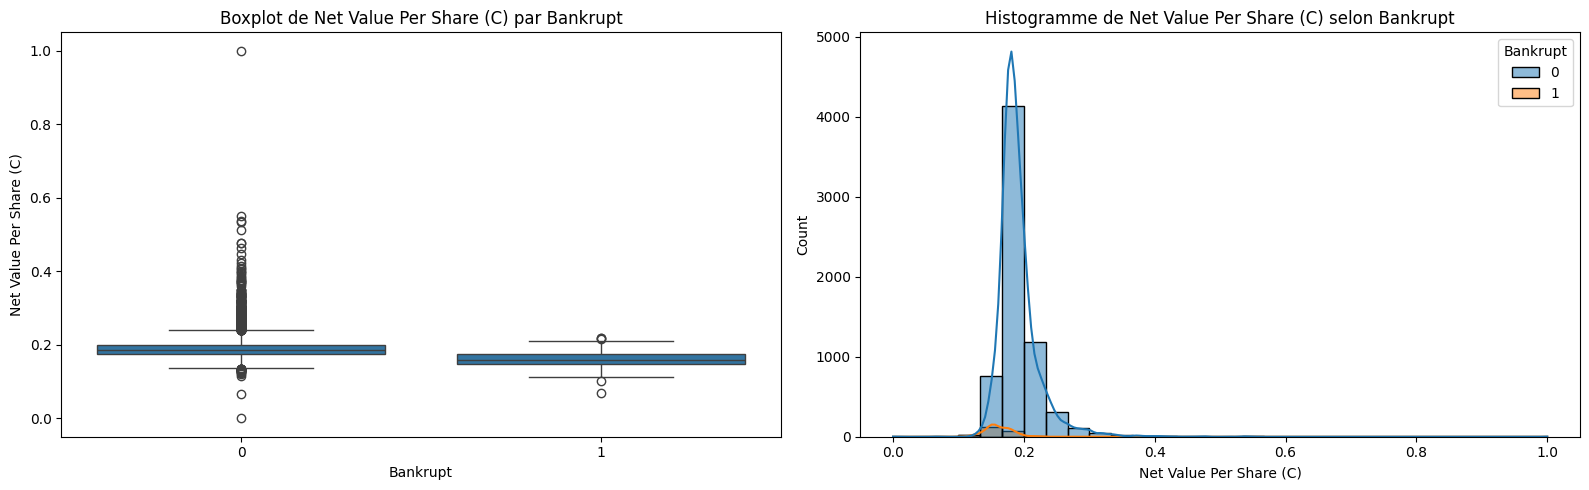

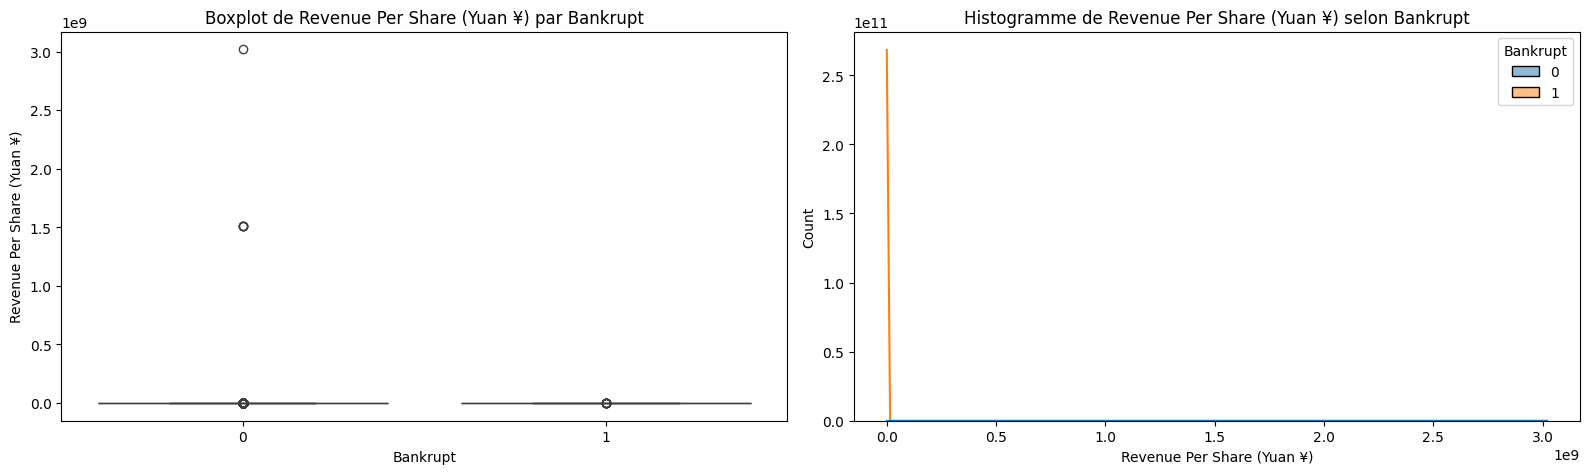

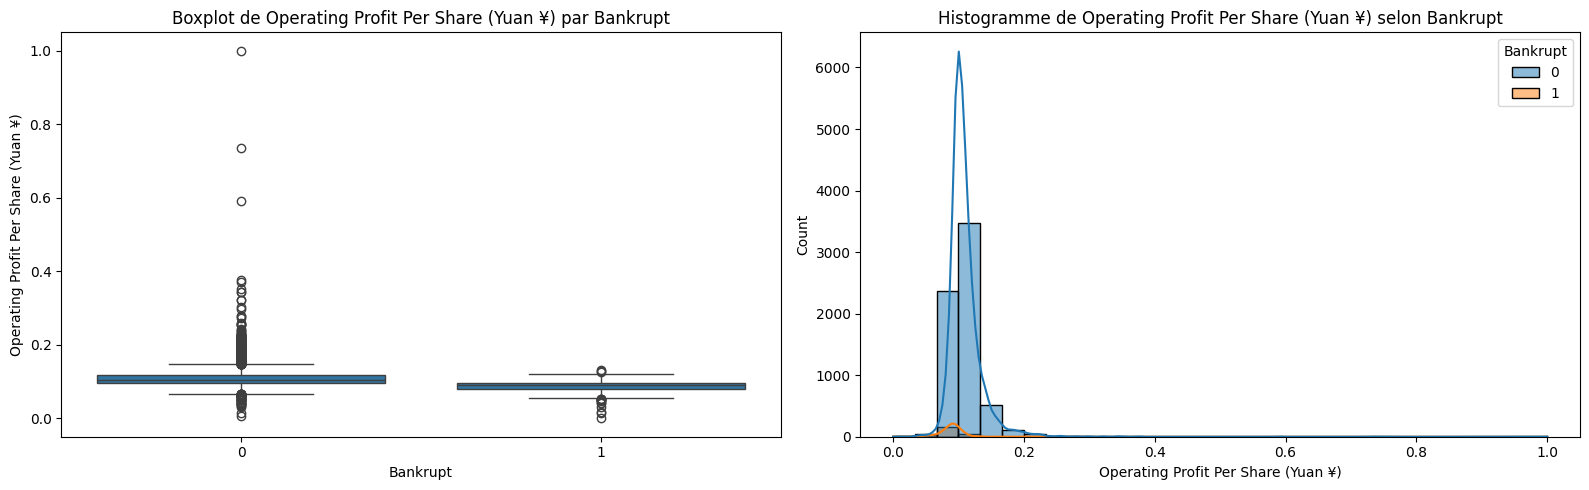

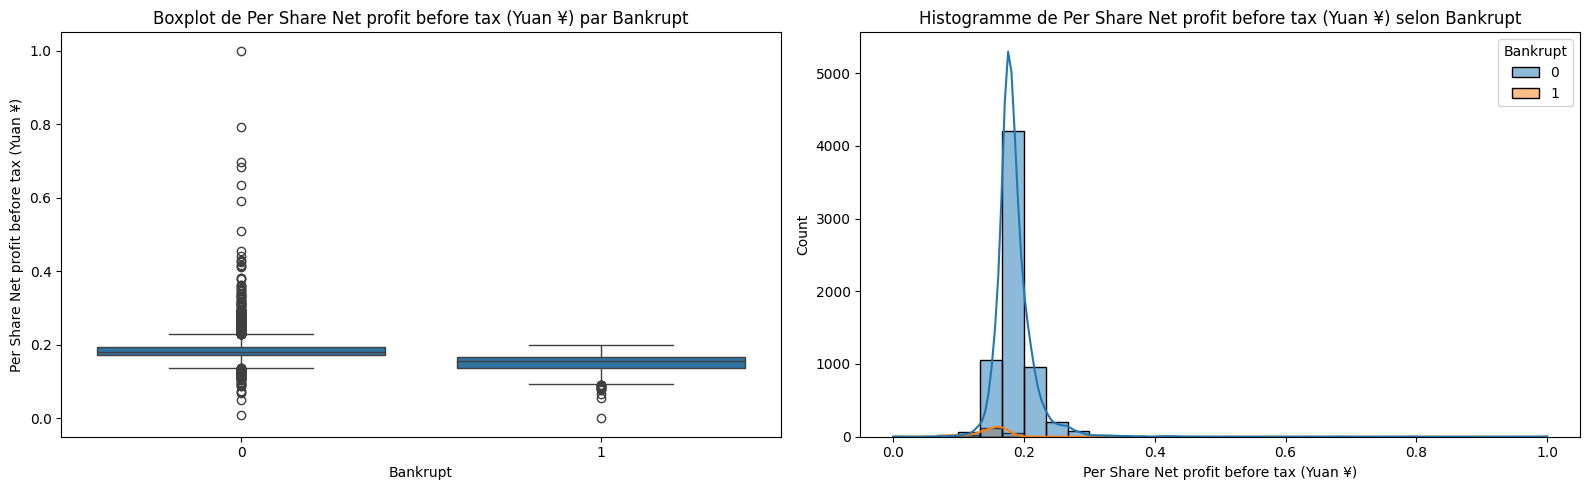

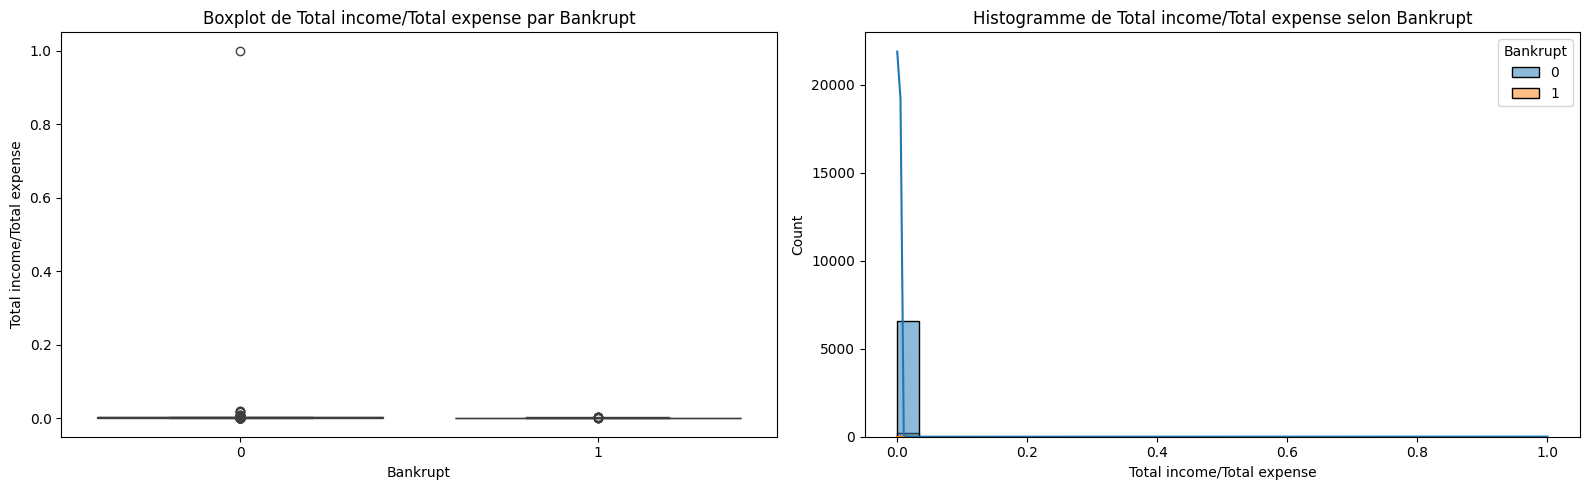

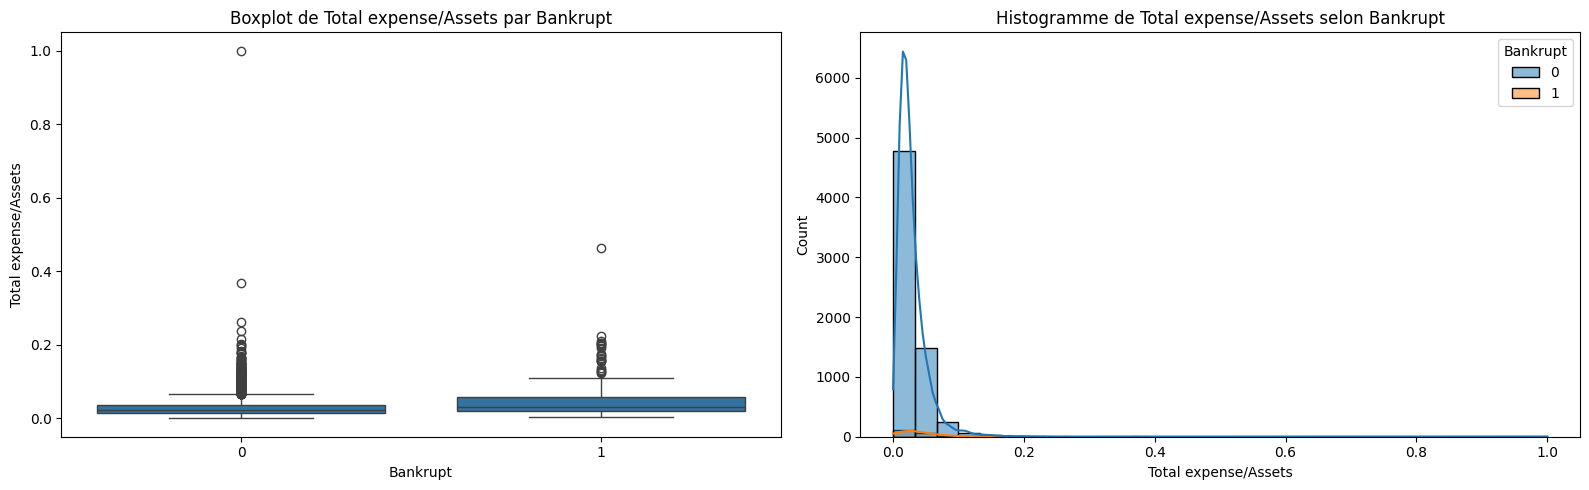

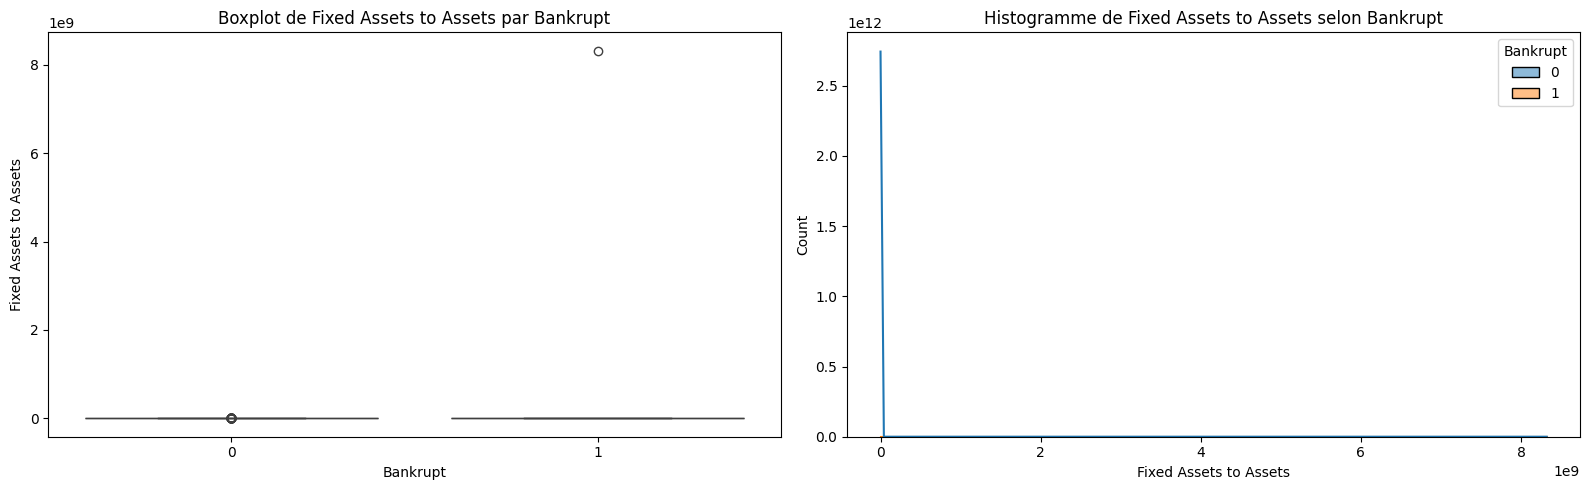

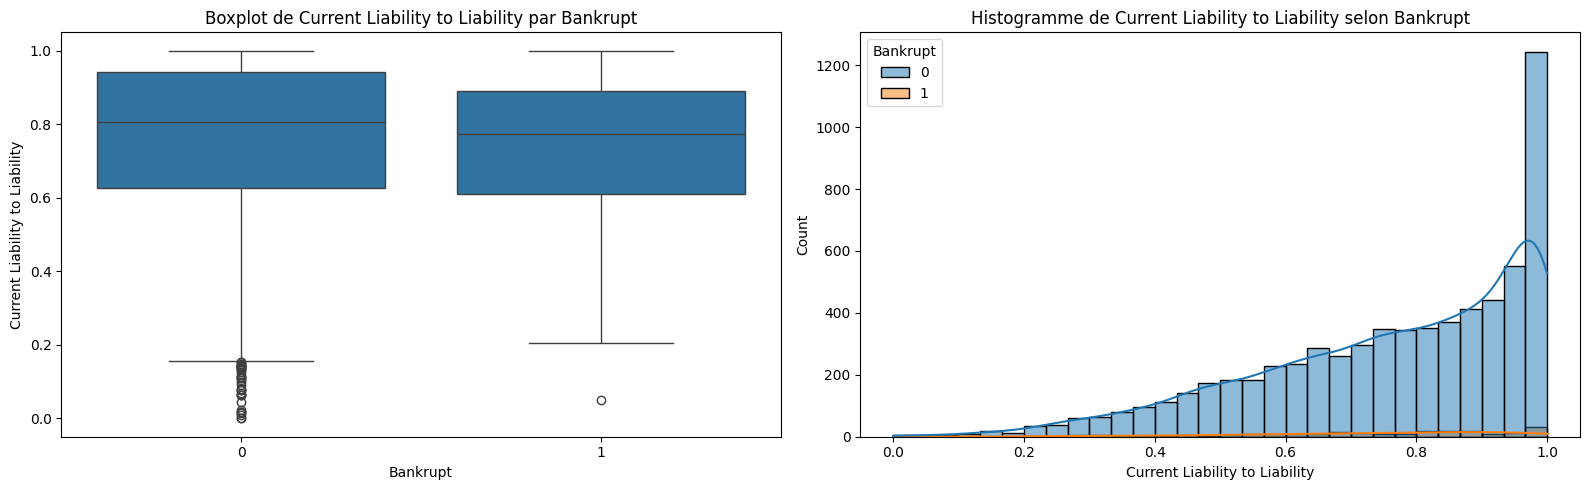

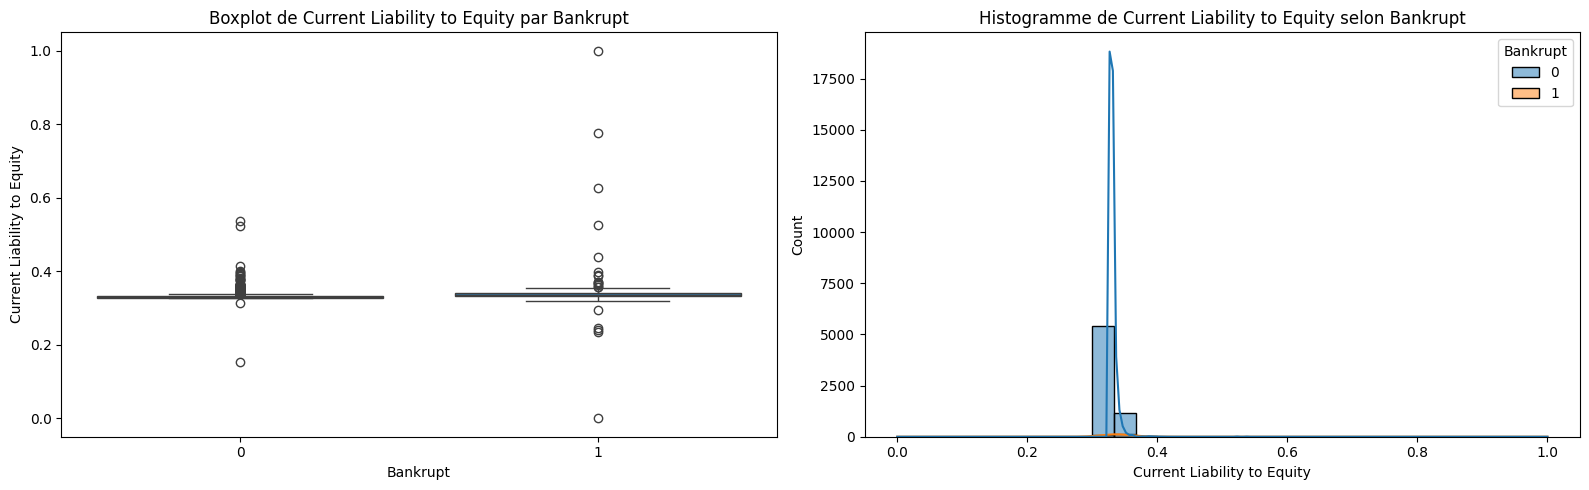

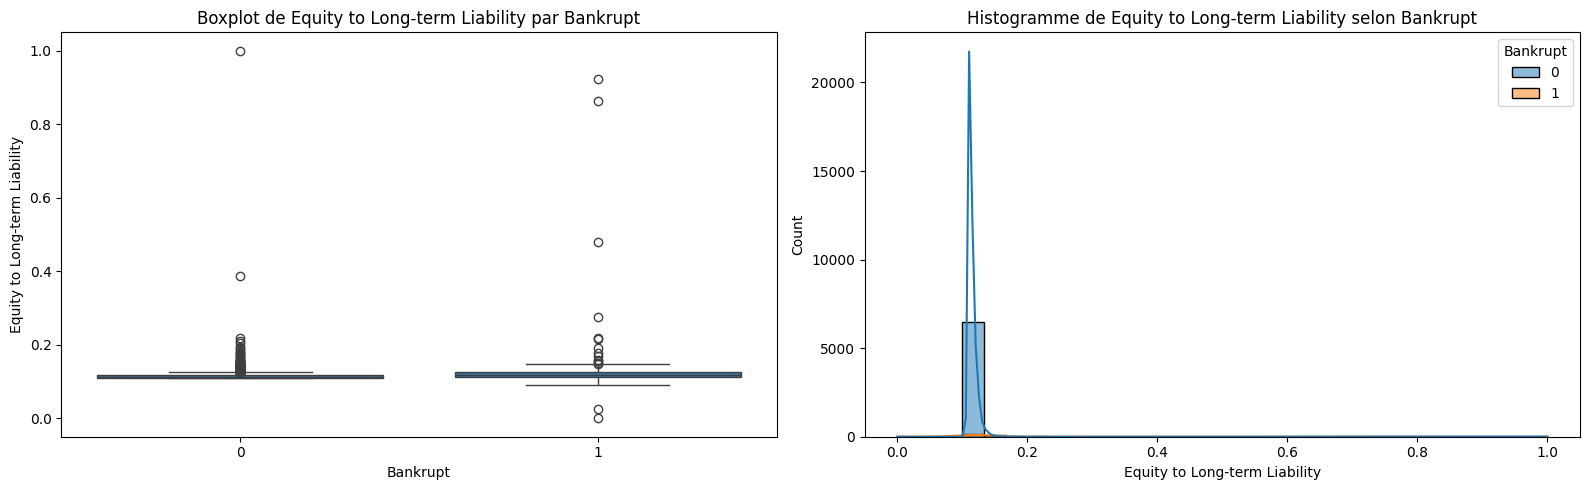

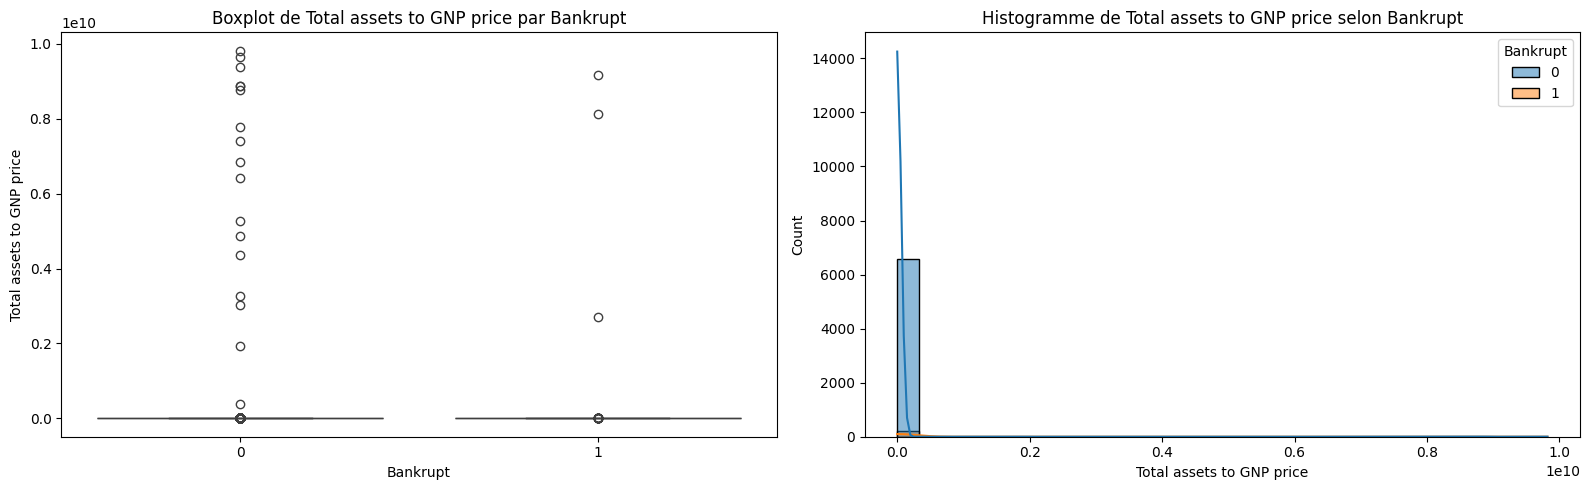

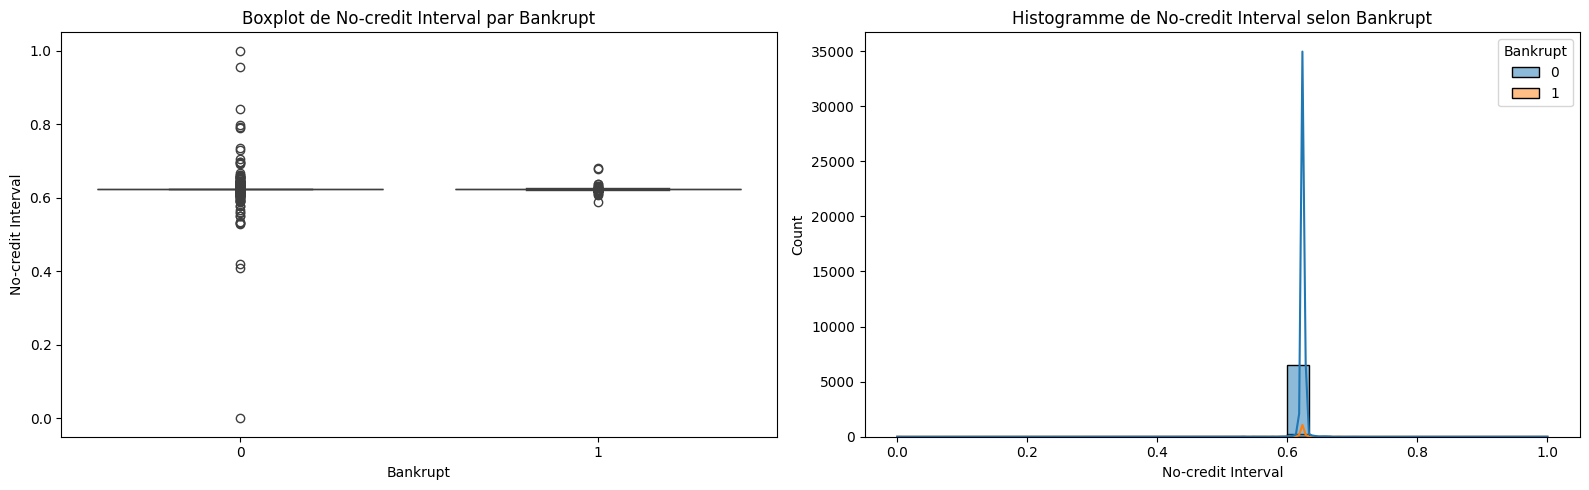

In [6]:
for col in autres:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Boxplot
    sns.boxplot(x='Bankrupt', y=col, data=data_solv, ax=axes[0])
    axes[0].set_title(f'Boxplot de {col} par Bankrupt')

    # Histogramme
    sns.histplot(data=data_solv, x=col, hue='Bankrupt', kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Histogramme de {col} selon Bankrupt')

    plt.tight_layout()
    plt.show()


Possibilité de passer en variable qualitative les variables quantitatives suivantes : 
- "Tax rate (A)", 
- Current Liability to Liability

Pour fair autre chose que de la recherche de faillite


### CAH sur les entreprises

In [7]:
data_quant = data[[col for col in data.columns if col in autres]]

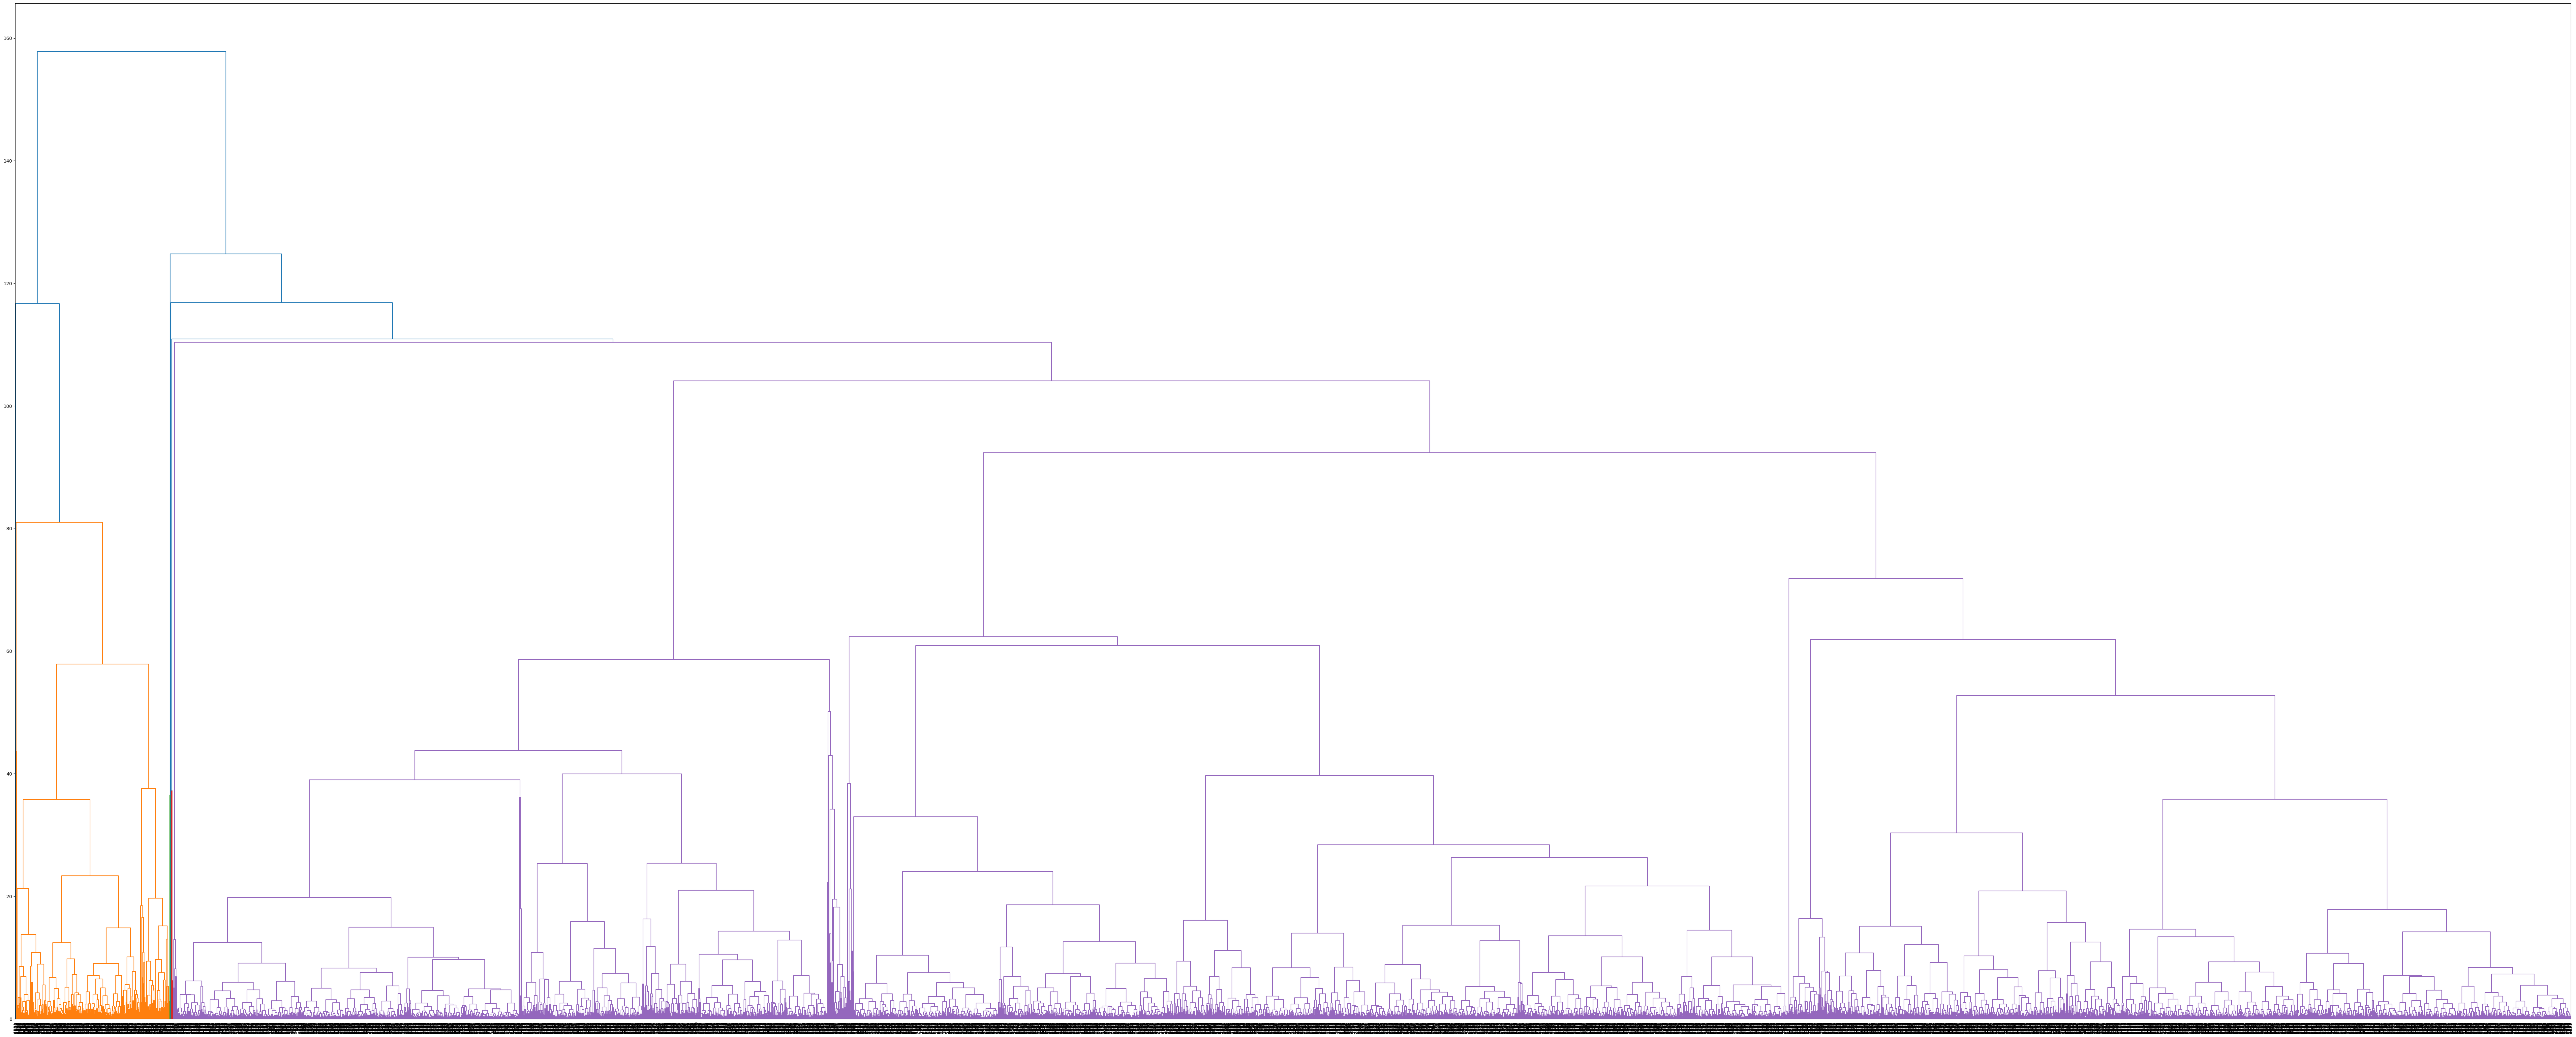

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from src1.utils import plot_dendrogram

# Normalisation des variables numériques
norm = StandardScaler()
quantiative_norm = norm.fit_transform(data_quant)

cls = AgglomerativeClustering(metric="euclidean", linkage="ward", distance_threshold=0, n_clusters=None)
cls.fit(quantiative_norm)
plt.figure(figsize=(100, 40))
plot_dendrogram(cls)

On remarque 2 clusters

### AFTD sur les entreprises

In [9]:
# Prend trop de temps
#aftd = MDS(n_components=2, dissimilarity='euclidean')
#dist = aftd.fit_transform(quantiative_norm)
#print(aftd.stress_)
#plt.scatter(*dist.T)
#plt.show()

In [10]:
#plot_Shepard(aftd)
#plt.show()

### ACP

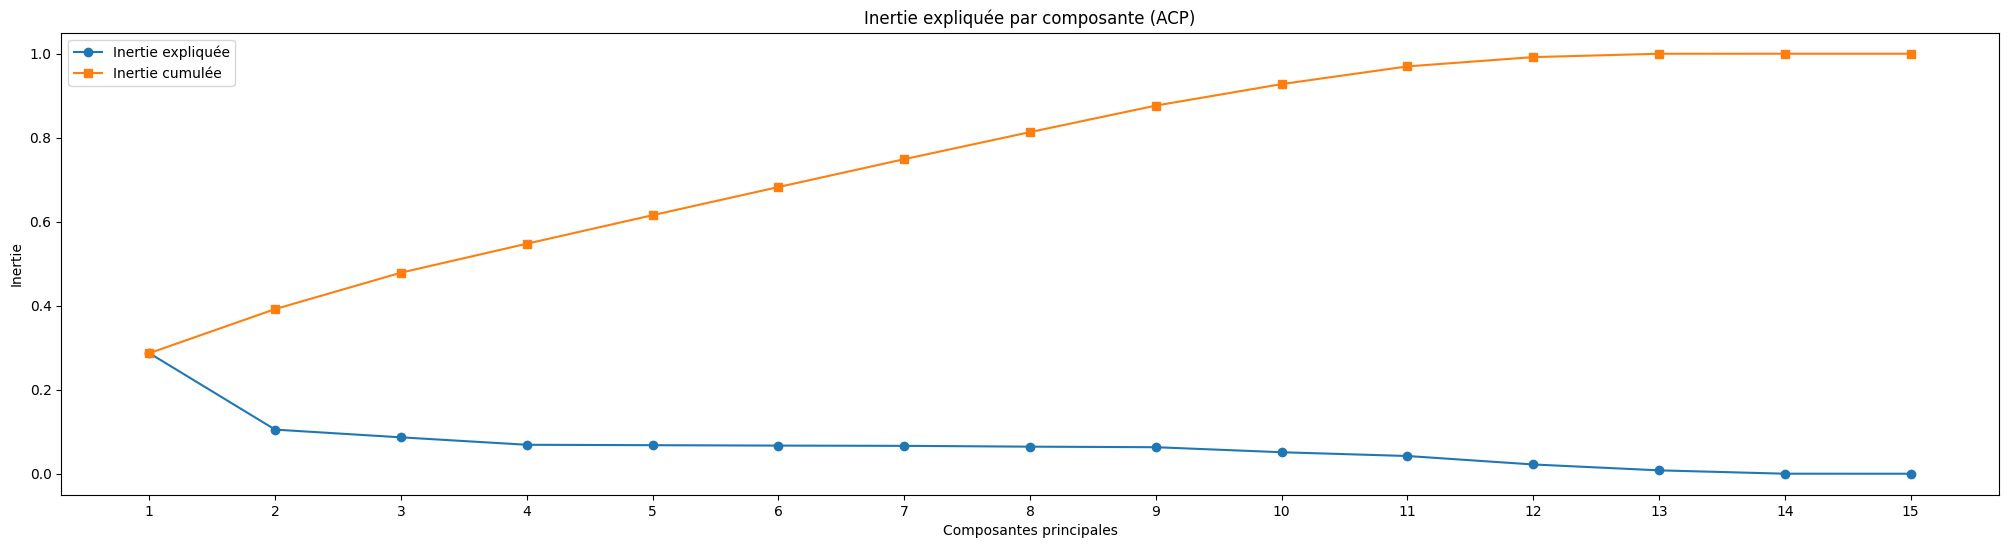

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cls = PCA()
pcs = cls.fit_transform(quantiative_norm)

# Inertie expliquée et cumulée
inertie_exp = cls.explained_variance_ratio_
cumul_inertie = inertie_exp.cumsum()

plt.figure(figsize=(25, 6))
plt.plot(range(1, len(inertie_exp) + 1), inertie_exp, marker='o', label="Inertie expliquée")
plt.plot(range(1, len(cumul_inertie) + 1), cumul_inertie, marker='s', label="Inertie cumulée")
plt.xticks(range(1, len(inertie_exp) + 1))
plt.xlabel("Composantes principales")
plt.ylabel("Inertie")
plt.title("Inertie expliquée par composante (ACP)")
plt.legend()

<Axes: xlabel='PC14', ylabel='PC15'>

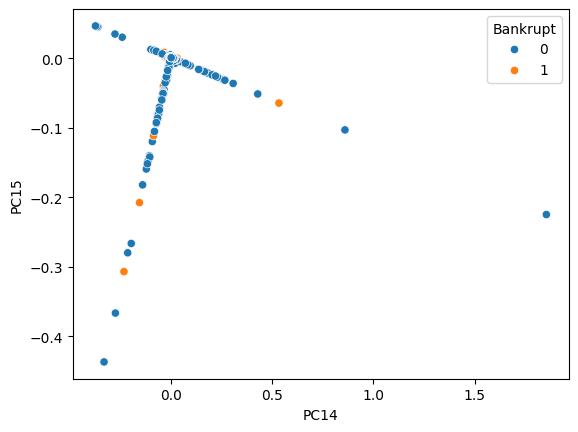

In [12]:
data_acp = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, len(inertie_exp)+1)])
data_acp['Bankrupt'] = data['Bankrupt?'].values
data_acp['Liability-Assets Flag']=data['Liability-Assets Flag'].values

sns.scatterplot(x="PC14", y="PC15", hue=data_acp.Bankrupt, data=data_acp)